In [ ]:
import pandas as pd

**Load** **the** **Dataset**

In [ ]:
fakenews_ds = pd.read_csv('/content/sample_data/data.csv')
fakenews_ds.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


**Data Pre-processing**




In [ ]:
fakenews_ds.shape

(4009, 4)

**Data** **cleaning**

In [ ]:
fakenews_ds.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

**Removing Null value**

In [ ]:
fakenews_ds= fakenews_ds.dropna()
fakenews_ds

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",0
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [ ]:
fakenews_ds = fakenews_ds.drop(columns=['Headline'], axis=1)
fakenews_ds

,URLs,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,"Country singer Jason Aldean, who was performin...",1
...,...,...,...
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,"Vietnam Is in Great Danger, You Must Publish a...",0
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4007,https://www.reuters.com/article/us-china-pharm...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [ ]:
fakenews_ds['Label'].value_counts()

Label
0    2120
1    1868
Name: count, dtype: int64

In [ ]:
data_type = fakenews_ds['Body'].dtype
data_type

dtype('O')

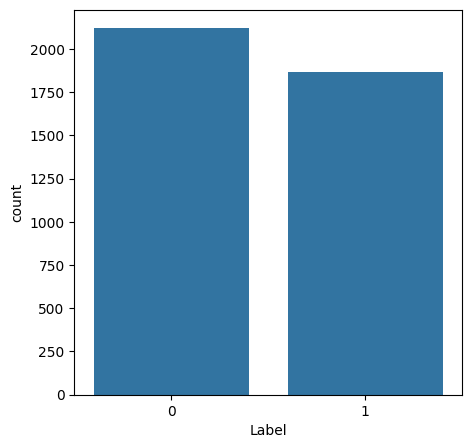

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.countplot(x=fakenews_ds['Label'])
plt.show()

**Stop-word removal   stemming**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk


nltk.download('punkt')
import nltk



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stopWords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def pre_preocess_text(text):
    words = nltk.word_tokenize(text)
    filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stopWords]
    return ' '.join(filtered_words)





In [ ]:
fakenews_ds['Body'] = fakenews_ds['Body'].apply(pre_preocess_text)

print(fakenews_ds)

                                                   URLs  \
0     http://www.bbc.com/news/world-us-canada-414191...   
1     https://www.reuters.com/article/us-filmfestiva...   
2     https://www.nytimes.com/2017/10/09/us/politics...   
3     https://www.reuters.com/article/us-mexico-oil-...   
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...   
...                                                 ...   
4003  http://beforeitsnews.com/u-s-politics/2017/10/...   
4004  http://beforeitsnews.com/sports/2017/09/trends...   
4005  http://beforeitsnews.com/u-s-politics/2017/10/...   
4007  https://www.reuters.com/article/us-china-pharm...   
4008  http://beforeitsnews.com/u-s-politics/2017/10/...   

                                                   Body  Label  
0     imag copyright getti imag sunday morn , donald...      1  
1     london ( reuter ) - “ last flag fli ” , comedy...      1  
2     feud broke public view last week mr. corker sa...      1  
3     mexico citi ( reuter ) - 

**Vectorizing text**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(fakenews_ds['Body'])
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(vectorized_df)

      00  000  0000  00011189  000ft  000ha  000km  000sq  001  0011189  ...  \
0      0    0     0         0      0      0      0      0    0        0  ...   
1      0    0     0         0      0      0      0      0    0        0  ...   
2      0    0     0         0      0      0      0      0    0        0  ...   
3      0    0     0         0      0      0      0      0    0        0  ...   
4      0    0     0         0      0      0      0      0    0        0  ...   
...   ..  ...   ...       ...    ...    ...    ...    ...  ...      ...  ...   
3983   0    0     0         0      0      0      0      0    0        0  ...   
3984   0    0     0         0      0      0      0      0    0        0  ...   
3985   0    2     0         0      0      0      0      0    0        0  ...   
3986   0    0     0         0      0      0      0      0    0        0  ...   
3987   0    0     0         0      0      0      0      0    0        0  ...   

      zócalo  álvaro  école  émigré  ðÿ

In [ ]:
fakenews_ds['Body'] = fakenews_ds['Body'].fillna('')

fakenews_ds['Body'] = fakenews_ds['Body'].astype(str)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(fakenews_ds['Body'])
X.shape

(3988, 34828)

In [ ]:
Y = fakenews_ds['Label']

In [ ]:
print(X)

  (0, 16288)	0.03989715392108366
  (0, 32237)	0.0467703942007362
  (0, 20142)	0.037976301123229576
  (0, 6471)	0.020654282896359975
  (0, 29449)	0.020773220537456085
  (0, 29252)	0.02016573229351471
  (0, 16891)	0.023557420737263593
  (0, 24189)	0.025524127599133382
  (0, 18100)	0.020293206814576522
  (0, 3029)	0.02854877629035137
  (0, 23785)	0.023148351007897257
  (0, 1882)	0.0219972436705299
  (0, 32371)	0.04385419273793592
  (0, 10129)	0.03566158180147299
  (0, 4269)	0.021103062461946393
  (0, 19468)	0.02207219617315852
  (0, 34048)	0.03048529110153436
  (0, 33781)	0.021826089087273386
  (0, 9572)	0.03157021207447151
  (0, 5559)	0.02238225247306239
  (0, 11205)	0.012740205262655444
  (0, 18586)	0.016466554095823604
  (0, 22350)	0.016244825244602752
  (0, 7815)	0.03308128900154235
  (0, 9529)	0.024213532962925506
  :	:
  (3987, 19265)	0.014293407927982602
  (3987, 8603)	0.04496226773246388
  (3987, 18812)	0.015776882896619385
  (3987, 31991)	0.012739227583276433
  (3987, 29423)	0.11

In [ ]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
4003    0
4004    0
4005    0
4007    1
4008    0
Name: Label, Length: 3988, dtype: int64


**TRAIN-TEST-SPLIT of Data set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
print(X.shape,X_train.shape,X_test.shape)

(3988, 34828) (2671, 34828) (1317, 34828)


SVC Algorithm

In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

**Accuracy score**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print('accuracy score of training data is  :', training_data_accuracy)

accuracy score of training data is  : 0.9992512167727443


In [ ]:
fakenews_ds['Body'] = fakenews_ds['Body'].fillna('')

In [ ]:
fakenews_ds['Body'] = fakenews_ds['Body'].astype(str)

In [ ]:
fakenews_ds['Body'] = fakenews_ds['Body'].astype(str)

In [ ]:
fakenews_ds['Body'] = fakenews_ds['Body'].astype(str)

fakenews_ds['Body_lower'] = fakenews_ds['Body'].apply(lambda x: x.lower() if isinstance(x, str) else x)

**Feature Engineering - using TF-IDF AND SVC Model Building**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fakenews_ds['Body_lower'], Y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Creating and training the SVC model
svc_model1 = SVC(C=1, kernel='linear', gamma=1)
svc_model1.fit(X_train_tfidf, y_train)

# Making predictions
prediction1 = svc_model1.predict(X_test_tfidf)

# Printing classification report
print(classification_report(y_test, prediction1, target_names=['Fake', 'True']))


              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99       450
        True       0.98      0.98      0.98       348

    accuracy                           0.98       798
   macro avg       0.98      0.98      0.98       798
weighted avg       0.98      0.98      0.98       798



**Confusion Matrix**

Confusion Matrix:
[[444   6]
 [  6 342]]


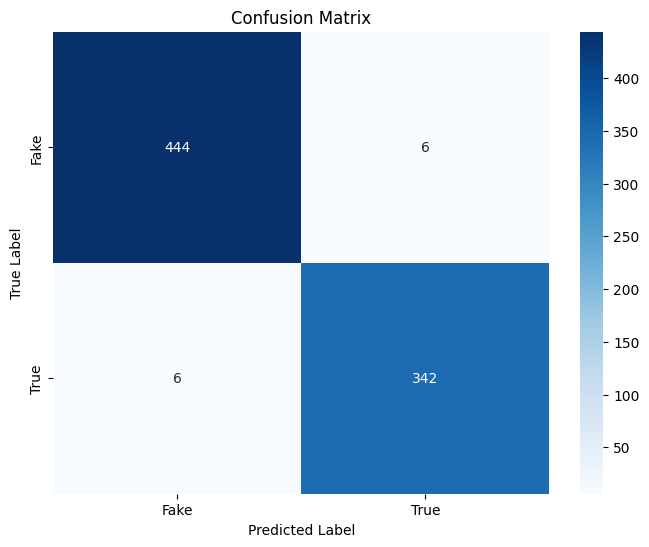

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, prediction1)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


import matplotlib.pyplot as plt
import seaborn as sns

# Plot for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

** LST Model - Model Building and evalution**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(fakenews_ds['Body_lower'])
X_seq = tokenizer.texts_to_sequences(fakenews_ds['Body_lower'])

max_len = max(len(seq) for seq in X_seq)
X_pad = pad_sequences(X_seq, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(X_pad, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1/3
50/50 [==============================] - 400s 8s/step - loss: 0.4067 - accuracy: 0.8495 - val_loss: 0.1478 - val_accuracy: 0.9524
Epoch 2/3
50/50 [==============================] - 393s 8s/step - loss: 0.0637 - accuracy: 0.9834 - val_loss: 0.1117 - val_accuracy: 0.9612
Epoch 3/3
25/25 [==============================] - 15s 586ms/step
Accuracy: 0.9761904761904762
